In [1]:
pip install geopandas shapely

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from geopy.distance import geodesic
import numpy as np
import geopandas as gpd
from shapely.geometry import Point

In [3]:
election = pd.read_csv ('RIVERS_crosschecked.csv')

In [4]:
election

,State,LGA,Ward,Latitude,Longitude,PU-Code,PU-Name,Accredited_Voters,Registered_Voters,Results_Found,...,Result_Sheet_Stamped,Result_Sheet_Corrected,Result_Sheet_Invalid,Result_Sheet_Unclear,Result_Sheet_Unsigned,APC,LP,PDP,NNPP,Results_File
0,RIVERS,ABUA-ODUAL,ABUA I,4.809864,6.589017,32-01-01-001,"OGBEMA I, TOWN HALL",129,991,True,...,False,False,False,False,UNKNOWN,0,0,0,0,https://docs.inecelectionresults.net/elections...
1,RIVERS,ABUA-ODUAL,ABUA I,4.809864,6.589017,32-01-01-002,"OGBEMA II, C.P.S HALL",129,553,True,...,False,True,False,False,UNKNOWN,0,0,0,0,https://docs.inecelectionresults.net/elections...
2,RIVERS,ABUA-ODUAL,ABUA I,4.809864,6.589017,32-01-01-003,"OGBEMA III, C.P.S HALL",29,494,True,...,False,True,False,False,UNKNOWN,10,1,17,0,https://docs.inecelectionresults.net/elections...
3,RIVERS,ABUA-ODUAL,ABUA I,4.809864,6.589017,32-01-01-004,"OGBEMA IV, TOWN HALL",89,394,True,...,False,False,False,False,UNKNOWN,14,5,63,0,https://docs.inecelectionresults.net/elections...
4,RIVERS,ABUA-ODUAL,ABUA I,4.809864,6.589017,32-01-01-005,IGUTA ADAUYO TOWN HALL I,46,214,True,...,False,False,False,False,UNKNOWN,5,0,41,0,https://docs.inecelectionresults.net/elections...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4764,RIVERS,TAI,OYIGBO WEST,2.830663,9.777686,32-23-08-009,"C.P.S. FIELD I, BARAYIRA",56,104,True,...,False,False,False,False,UNKNOWN,41,4,6,0,https://docs.inecelectionresults.net/elections...
4765,RIVERS,TAI,OYIGBO WEST,2.830116,9.778518,32-23-08-011,"BUE EEDEE OPEN SPACE, SIME",16,34,True,...,False,False,False,False,UNKNOWN,10,1,5,0,https://docs.inecelectionresults.net/elections...
4766,RIVERS,TAI,OYIGBO WEST,2.829569,9.779349,32-23-08-012,"MARKET SQUARE, SIME",10,14,True,...,False,False,False,False,UNKNOWN,7,1,2,0,https://docs.inecelectionresults.net/elections...
4767,RIVERS,TAI,OYIGBO WEST,2.829022,9.780181,32-23-08-013,". BUE-ZOR OPEN SPACE, BY NEW APOSTOLIC CHURCH,...",42,68,True,...,False,False,False,False,UNKNOWN,22,3,13,0,https://docs.inecelectionresults.net/elections...


In [5]:
election.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4769 entries, 0 to 4768
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   4769 non-null   object 
 1   LGA                     4769 non-null   object 
 2   Ward                    4769 non-null   object 
 3   Latitude                4769 non-null   float64
 4   Longitude               4769 non-null   float64
 5   PU-Code                 4769 non-null   object 
 6   PU-Name                 4769 non-null   object 
 7   Accredited_Voters       4769 non-null   int64  
 8   Registered_Voters       4769 non-null   int64  
 9   Results_Found           4769 non-null   bool   
 10  Transcription_Count     4769 non-null   int64  
 11  Result_Sheet_Stamped    4769 non-null   bool   
 12  Result_Sheet_Corrected  4769 non-null   bool   
 13  Result_Sheet_Invalid    4769 non-null   bool   
 14  Result_Sheet_Unclear    4769 non-null   

In [6]:
election.duplicated().value_counts()

False    4769
Name: count, dtype: int64

In [7]:
gdf = gpd.GeoDataFrame(election, geometry=gpd.points_from_xy(election.Longitude, election.Latitude))
gdf = gdf.set_crs("EPSG:4326").to_crs(epsg=3857) 

def find_neighbors(gdf, radius):
    Neighbors = []
    for i, row in gdf.iterrows():
        point = row.geometry
        nearby_points = gdf[gdf.geometry.distance(point) <= radius]
        Neighbor_names = nearby_points.loc[nearby_points['PU-Code'] != row['PU-Code'], 'PU-Code'].tolist()
        Neighbors.append(Neighbor_names)
    return Neighbors

radius = 1000  
election['Neighbors'] = find_neighbors(gdf, radius)

election.to_csv('Refurbished.csv', index=False)

print(election.head())


    State         LGA    Ward  Latitude  Longitude       PU-Code  \
0  RIVERS  ABUA-ODUAL  ABUA I  4.809864   6.589017  32-01-01-001   
1  RIVERS  ABUA-ODUAL  ABUA I  4.809864   6.589017  32-01-01-002   
2  RIVERS  ABUA-ODUAL  ABUA I  4.809864   6.589017  32-01-01-003   
3  RIVERS  ABUA-ODUAL  ABUA I  4.809864   6.589017  32-01-01-004   
4  RIVERS  ABUA-ODUAL  ABUA I  4.809864   6.589017  32-01-01-005   

                     PU-Name  Accredited_Voters  Registered_Voters  \
0        OGBEMA I, TOWN HALL                129                991   
1      OGBEMA II, C.P.S HALL                129                553   
2     OGBEMA III, C.P.S HALL                 29                494   
3       OGBEMA IV, TOWN HALL                 89                394   
4  IGUTA  ADAUYO TOWN HALL I                 46                214   

   Results_Found  ...  Result_Sheet_Corrected  Result_Sheet_Invalid  \
0           True  ...                   False                 False   
1           True  ...       

In [8]:
election

,State,LGA,Ward,Latitude,Longitude,PU-Code,PU-Name,Accredited_Voters,Registered_Voters,Results_Found,...,Result_Sheet_Corrected,Result_Sheet_Invalid,Result_Sheet_Unclear,Result_Sheet_Unsigned,APC,LP,PDP,NNPP,Results_File,Neighbors
0,RIVERS,ABUA-ODUAL,ABUA I,4.809864,6.589017,32-01-01-001,"OGBEMA I, TOWN HALL",129,991,True,...,False,False,False,UNKNOWN,0,0,0,0,https://docs.inecelectionresults.net/elections...,"[32-01-01-002, 32-01-01-003, 32-01-01-004, 32-..."
1,RIVERS,ABUA-ODUAL,ABUA I,4.809864,6.589017,32-01-01-002,"OGBEMA II, C.P.S HALL",129,553,True,...,True,False,False,UNKNOWN,0,0,0,0,https://docs.inecelectionresults.net/elections...,"[32-01-01-001, 32-01-01-003, 32-01-01-004, 32-..."
2,RIVERS,ABUA-ODUAL,ABUA I,4.809864,6.589017,32-01-01-003,"OGBEMA III, C.P.S HALL",29,494,True,...,True,False,False,UNKNOWN,10,1,17,0,https://docs.inecelectionresults.net/elections...,"[32-01-01-001, 32-01-01-002, 32-01-01-004, 32-..."
3,RIVERS,ABUA-ODUAL,ABUA I,4.809864,6.589017,32-01-01-004,"OGBEMA IV, TOWN HALL",89,394,True,...,False,False,False,UNKNOWN,14,5,63,0,https://docs.inecelectionresults.net/elections...,"[32-01-01-001, 32-01-01-002, 32-01-01-003, 32-..."
4,RIVERS,ABUA-ODUAL,ABUA I,4.809864,6.589017,32-01-01-005,IGUTA ADAUYO TOWN HALL I,46,214,True,...,False,False,False,UNKNOWN,5,0,41,0,https://docs.inecelectionresults.net/elections...,"[32-01-01-001, 32-01-01-002, 32-01-01-003, 32-..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4764,RIVERS,TAI,OYIGBO WEST,2.830663,9.777686,32-23-08-009,"C.P.S. FIELD I, BARAYIRA",56,104,True,...,False,False,False,UNKNOWN,41,4,6,0,https://docs.inecelectionresults.net/elections...,"[32-23-07-017, 32-23-07-018, 32-23-07-019, 32-..."
4765,RIVERS,TAI,OYIGBO WEST,2.830116,9.778518,32-23-08-011,"BUE EEDEE OPEN SPACE, SIME",16,34,True,...,False,False,False,UNKNOWN,10,1,5,0,https://docs.inecelectionresults.net/elections...,"[32-23-07-018, 32-23-07-019, 32-23-07-020, 32-..."
4766,RIVERS,TAI,OYIGBO WEST,2.829569,9.779349,32-23-08-012,"MARKET SQUARE, SIME",10,14,True,...,False,False,False,UNKNOWN,7,1,2,0,https://docs.inecelectionresults.net/elections...,"[32-23-07-019, 32-23-07-020, 32-23-07-021, 32-..."
4767,RIVERS,TAI,OYIGBO WEST,2.829022,9.780181,32-23-08-013,". BUE-ZOR OPEN SPACE, BY NEW APOSTOLIC CHURCH,...",42,68,True,...,False,False,False,UNKNOWN,22,3,13,0,https://docs.inecelectionresults.net/elections...,"[32-23-07-020, 32-23-07-021, 32-23-07-022, 32-..."


In [46]:
def calculate_outlier_scores_iqr(election):
    results = []

    if isinstance(election['Neighbors'].iloc[0], str):
        election['Neighbors'] = election['Neighbors'].apply(eval)
    
    if election['PU-Code'].duplicated().any():
      
        numeric_cols = election.select_dtypes(include=np.number).columns
        non_numeric_cols = election.select_dtypes(exclude=np.number).columns
        
        aggregated_numeric = election.groupby('PU-Code')[numeric_cols].mean().reset_index()
        
        aggregated_non_numeric = election.groupby('PU-Code')[non_numeric_cols].agg(lambda x: x.mode()[0] if not x.mode().empty else x.iloc[0]).reset_index()
        
    
        election = pd.merge(aggregated_numeric, aggregated_non_numeric, on='PU-Code')
    
    pu_dict = election.set_index('PU-Code').to_dict(orient='index')
    
    def get_neighbor_votes(neighbors, party):
        votes = []
        for neighbor in neighbors:
            if neighbor in pu_dict:
                votes.append(pu_dict[neighbor][party])
        return votes

    for pu_code, row in election.set_index('PU-Code').iterrows():
        neighbors = row['Neighbors']
        party_votes = {
            'APC': row['APC'],
            'LP': row['LP'],
            'PDP': row['PDP'],
            'NNPP': row['NNPP']
        }
        
        
        outlier_status = {
            'PU-Code': pu_code,
            'APC_Outlier': np.nan,
            'APC_Outlier_Value': np.nan,
            'LP_Outlier': np.nan,
            'LP_Outlier_Value': np.nan,
            'PDP_Outlier': np.nan,
            'PDP_Outlier_Value': np.nan,
            'NNPP_Outlier': np.nan,
            'NNPP_Outlier_Value': np.nan
        }
        
        for party in ['APC', 'LP', 'PDP', 'NNPP']:
            neighbor_votes = get_neighbor_votes(neighbors, party)
            if len(neighbor_votes) > 1:  
                votes = np.array(neighbor_votes)
                q1 = np.percentile(votes, 25)
                q3 = np.percentile(votes, 75)
                iqr = q3 - q1
                lower_bound = q1 - 1.5 * iqr
                upper_bound = q3 + 1.5 * iqr
                
                current_votes = party_votes[party]
                is_outlier = (current_votes < lower_bound) or (current_votes > upper_bound)
                
               
                outlier_status[f'{party}_Outlier'] = is_outlier
                outlier_status[f'{party}_Outlier_Value'] = current_votes if is_outlier else 0
        
        results.append(outlier_status)

    outlier_df = pd.DataFrame(results)
    return outlier_df

outlier_scores_iqr = calculate_outlier_scores_iqr(election)


election_with_outliers = pd.merge(election, outlier_scores_iqr, on='PU-Code', how='left')


election_with_outliers.to_csv('election_with_outliers.csv', index=False)


print(election_with_outliers.head())


    State         LGA    Ward  Latitude  Longitude       PU-Code  \
0  RIVERS  ABUA-ODUAL  ABUA I  4.809864   6.589017  32-01-01-001   
1  RIVERS  ABUA-ODUAL  ABUA I  4.809864   6.589017  32-01-01-002   
2  RIVERS  ABUA-ODUAL  ABUA I  4.809864   6.589017  32-01-01-003   
3  RIVERS  ABUA-ODUAL  ABUA I  4.809864   6.589017  32-01-01-004   
4  RIVERS  ABUA-ODUAL  ABUA I  4.809864   6.589017  32-01-01-005   

                     PU-Name  Accredited_Voters  Registered_Voters  \
0        OGBEMA I, TOWN HALL                129                991   
1      OGBEMA II, C.P.S HALL                129                553   
2     OGBEMA III, C.P.S HALL                 29                494   
3       OGBEMA IV, TOWN HALL                 89                394   
4  IGUTA  ADAUYO TOWN HALL I                 46                214   

  Results_Found  ...                                       Results_File  \
0          True  ...  https://docs.inecelectionresults.net/elections...   
1          True  ...

In [48]:
election_with_outliers

,State,LGA,Ward,Latitude,Longitude,PU-Code,PU-Name,Accredited_Voters,Registered_Voters,Results_Found,...,Results_File,Neighbors,APC_Outlier,APC_Outlier_Value,LP_Outlier,LP_Outlier_Value,PDP_Outlier,PDP_Outlier_Value,NNPP_Outlier,NNPP_Outlier_Value
0,RIVERS,ABUA-ODUAL,ABUA I,4.809864,6.589017,32-01-01-001,"OGBEMA I, TOWN HALL",129,991,True,...,https://docs.inecelectionresults.net/elections...,"[32-01-01-002, 32-01-01-003, 32-01-01-004, 32-...",False,0.0,False,0.0,False,0.0,False,0.0
1,RIVERS,ABUA-ODUAL,ABUA I,4.809864,6.589017,32-01-01-002,"OGBEMA II, C.P.S HALL",129,553,True,...,https://docs.inecelectionresults.net/elections...,"[32-01-01-001, 32-01-01-003, 32-01-01-004, 32-...",False,0.0,False,0.0,False,0.0,False,0.0
2,RIVERS,ABUA-ODUAL,ABUA I,4.809864,6.589017,32-01-01-003,"OGBEMA III, C.P.S HALL",29,494,True,...,https://docs.inecelectionresults.net/elections...,"[32-01-01-001, 32-01-01-002, 32-01-01-004, 32-...",False,0.0,False,0.0,False,0.0,False,0.0
3,RIVERS,ABUA-ODUAL,ABUA I,4.809864,6.589017,32-01-01-004,"OGBEMA IV, TOWN HALL",89,394,True,...,https://docs.inecelectionresults.net/elections...,"[32-01-01-001, 32-01-01-002, 32-01-01-003, 32-...",False,0.0,False,0.0,False,0.0,False,0.0
4,RIVERS,ABUA-ODUAL,ABUA I,4.809864,6.589017,32-01-01-005,IGUTA ADAUYO TOWN HALL I,46,214,True,...,https://docs.inecelectionresults.net/elections...,"[32-01-01-001, 32-01-01-002, 32-01-01-003, 32-...",False,0.0,False,0.0,False,0.0,False,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4764,RIVERS,TAI,OYIGBO WEST,2.830663,9.777686,32-23-08-009,"C.P.S. FIELD I, BARAYIRA",56,104,True,...,https://docs.inecelectionresults.net/elections...,"[32-23-07-017, 32-23-07-018, 32-23-07-019, 32-...",False,0.0,False,0.0,False,0.0,False,0.0
4765,RIVERS,TAI,OYIGBO WEST,2.830116,9.778518,32-23-08-011,"BUE EEDEE OPEN SPACE, SIME",16,34,True,...,https://docs.inecelectionresults.net/elections...,"[32-23-07-018, 32-23-07-019, 32-23-07-020, 32-...",False,0.0,False,0.0,False,0.0,False,0.0
4766,RIVERS,TAI,OYIGBO WEST,2.829569,9.779349,32-23-08-012,"MARKET SQUARE, SIME",10,14,True,...,https://docs.inecelectionresults.net/elections...,"[32-23-07-019, 32-23-07-020, 32-23-07-021, 32-...",False,0.0,False,0.0,False,0.0,False,0.0
4767,RIVERS,TAI,OYIGBO WEST,2.829022,9.780181,32-23-08-013,". BUE-ZOR OPEN SPACE, BY NEW APOSTOLIC CHURCH,...",42,68,True,...,https://docs.inecelectionresults.net/elections...,"[32-23-07-020, 32-23-07-021, 32-23-07-022, 32-...",False,0.0,False,0.0,True,13.0,False,0.0


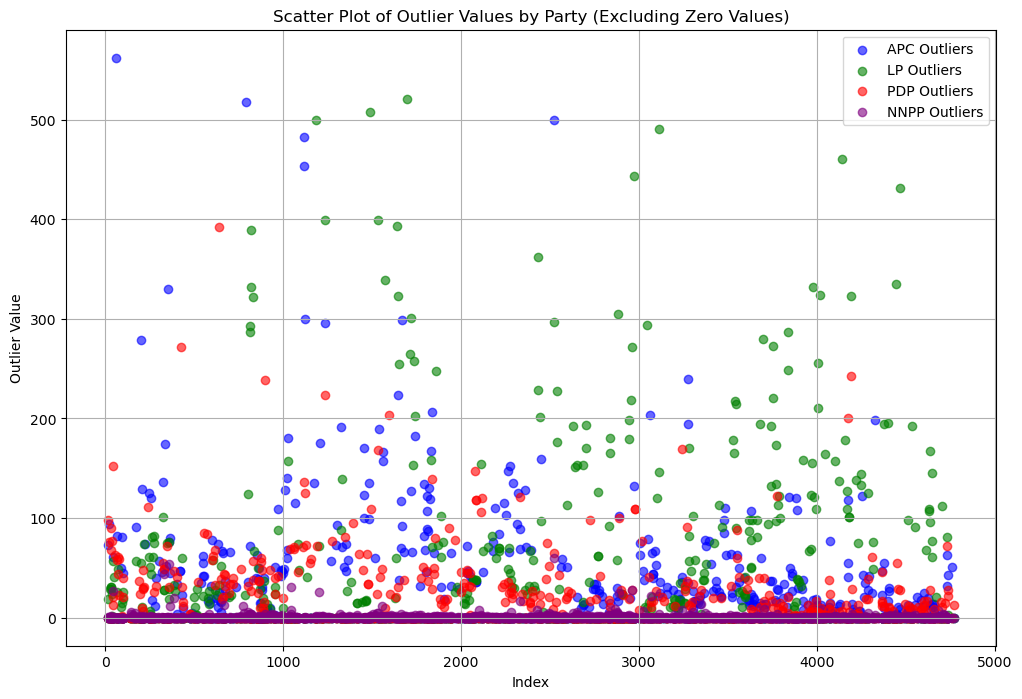

In [65]:
filtered_election = election_with_outliers[
    (election_with_outliers['APC_Outlier_Value'] > 0) |
    (election_with_outliers['LP_Outlier_Value'] > 0) |
    (election_with_outliers['PDP_Outlier_Value'] > 0) |
    (election_with_outliers['NNPP_Outlier_Value'] > 0)
]

plt.figure(figsize=(12, 8))

plt.scatter(
    filtered_election.index, 
    filtered_election['APC_Outlier_Value'], 
    color='blue', label='APC Outliers', alpha=0.6
)


plt.scatter(
    filtered_election.index, 
    filtered_election['LP_Outlier_Value'],
    color='green', label='LP Outliers', alpha=0.6
)


plt.scatter(
    filtered_election.index, 
    filtered_election['PDP_Outlier_Value'],  
    color='red', label='PDP Outliers', alpha=0.6
)


plt.scatter(
    filtered_election.index, 
    filtered_election['NNPP_Outlier_Value'],  
    color='purple', label='NNPP Outliers', alpha=0.6
)

plt.xlabel('Index')
plt.ylabel('Outlier Value')
plt.title('Scatter Plot of Outlier Values by Party (Excluding Zero Values)')
plt.legend()
plt.grid(True)

plt.show()


In [67]:
apc_outliers = election_with_outliers[(election_with_outliers['APC'] != 0) & (election_with_outliers['APC_Outlier_Value'])].shape[0]
lp_outliers = election_with_outliers[(election_with_outliers['LP'] != 0) & (election_with_outliers['LP_Outlier_Value'])].shape[0]
pdp_outliers = election_with_outliers[(election_with_outliers['PDP'] != 0) & (election_with_outliers['PDP_Outlier_Value'])].shape[0]
nnpp_outliers = election_with_outliers[(election_with_outliers['NNPP'] != 0) & (election_with_outliers['NNPP_Outlier_Value'])].shape[0]

print(f"APC Outliers: {apc_outliers}")
print(f"LP Outliers: {lp_outliers}")
print(f"PDP Outliers: {pdp_outliers}")
print(f"NNPP Outliers: {nnpp_outliers}")

APC Outliers: 370
LP Outliers: 301
PDP Outliers: 316
NNPP Outliers: 470


In [68]:
sorted_apc = election_with_outliers.sort_values(by='APC_Outlier_Value', ascending=False)
sorted_lp = election_with_outliers.sort_values(by='LP_Outlier_Value', ascending=False)
sorted_pdp = election_with_outliers.sort_values(by='PDP_Outlier_Value', ascending=False)
sorted_nnpp = election_with_outliers.sort_values(by='NNPP_Outlier_Value', ascending=False)

print("Top APC Outliers:")
print(sorted_apc[['PU-Code', 'APC_Outlier_Value', 'APC']].head())

print("\nTop LP Outliers:")
print(sorted_lp[['PU-Code', 'LP_Outlier_Value', 'LP']].head())

print("\nTop PDP Outliers:")
print(sorted_pdp[['PU-Code', 'PDP_Outlier_Value', 'PDP']].head())

print("\nTop NNPP Outliers:")
print(sorted_nnpp[['PU-Code', 'NNPP_Outlier_Value', 'NNPP']].head())


Top APC Outliers:
           PU-Code  APC_Outlier_Value  APC
60    32-01-07-003              562.0  562
788   32-06-11-020              518.0  518
2524  32-21-10-007              500.0  500
1117  32-10-10-009              482.0  482
1115  32-10-10-007              453.0  453

Top LP Outliers:
           PU-Code  LP_Outlier_Value   LP
1693  32-15-15-023             521.0  521
1488  32-15-02-001             508.0  508
1186  32-11-03-008             499.0  499
3112  32-03-02-011             490.0  490
4138  32-15-03-047             460.0  460

Top PDP Outliers:
           PU-Code  PDP_Outlier_Value  PDP
637   32-05-07-003              392.0  392
428   32-04-08-005              272.0  272
4191  32-15-06-025              243.0  243
897   32-08-07-003              239.0  239
1234  32-11-19-011              224.0  224

Top NNPP Outliers:
           PU-Code  NNPP_Outlier_Value  NNPP
2524  32-21-10-007                60.0    60
359   32-03-12-007                54.0    54
328   32-03-07-005    

In [74]:
def find_top_outliers(election_with_outliers):
    top_outliers = {}
    for party in ['APC', 'LP', 'PDP', 'NNPP']:
        party_outliers = election_with_outliers[election_with_outliers[f'{party}_Outlier_Value'] > 0]
        top_outliers[party] = party_outliers.nlargest(3, f'{party}_Outlier_Value')
    return top_outliers

def find_closest_polling_units(election, top_outliers):
    closest_polling_units = {}
    for party, outliers in top_outliers.items():
        closest_polling_units[party] = {}
        for _, outlier in outliers.iterrows():
            outlier_code = outlier['PU-Code']
            neighbors = election.loc[election['PU-Code'] == outlier_code, 'Neighbors'].values[0]
            closest_polling_units[party][outlier_code] = neighbors
    return closest_polling_units

top_outliers = find_top_outliers(election_with_outliers)

closest_polling_units = find_closest_polling_units(election_with_outliers, top_outliers)


for party, outliers in top_outliers.items():
    print(f"\nTop 3 outliers for {party}:")
    for _, outlier in outliers.iterrows():
        print(f"PU-Code: {outlier['PU-Code']}, Outlier Value: {outlier[f'{party}_Outlier_Value']}")
        neighbors = closest_polling_units[party][outlier['PU-Code']]
        print(f"Closest Polling Units: {neighbors}")




Top 3 outliers for APC:
PU-Code: 32-01-07-003, Outlier Value: 562.0
Closest Polling Units: ['32-01-07-001', '32-01-07-002', '32-01-07-004', '32-01-07-005', '32-01-07-006', '32-01-07-007', '32-01-07-008', '32-01-07-009']
PU-Code: 32-06-11-020, Outlier Value: 518.0
Closest Polling Units: ['32-06-11-002', '32-06-11-005', '32-06-11-008', '32-06-11-013', '32-06-11-018', '32-06-11-031']
PU-Code: 32-21-10-007, Outlier Value: 500.0
Closest Polling Units: ['32-21-09-015', '32-21-09-016', '32-21-09-017', '32-21-10-001', '32-21-10-002', '32-21-10-003', '32-21-10-004', '32-21-10-005', '32-21-10-006', '32-21-10-008', '32-21-10-009', '32-22-01-002', '32-22-01-003', '32-22-01-004', '32-22-01-005', '32-22-01-006', '32-22-01-007', '32-22-01-008']

Top 3 outliers for LP:
PU-Code: 32-15-15-023, Outlier Value: 521.0
Closest Polling Units: ['32-15-15-011', '32-15-15-013', '32-15-15-016', '32-15-15-017', '32-15-15-018', '32-15-15-019', '32-15-15-020', '32-15-15-021', '32-15-15-022', '32-15-15-024', '32-15-